<div style="border: 2px solid gold; padding: 2px; border-radius: 2px; background-color: #f0f8ff;">
    <h2 style="color: #4682b4; text-align: center;">🔥Epidemiological BMI of Children by Gender (2001-2023)🔥</h2> </div>

<div style="border: 2px solid gold; padding: 2px; border-radius: 2px; background-color: #f0f8ff;">
    <h2 style="color: #4682b4; text-align: center;">👀Thank you for visiting my notebook👀</h2> </div>





<div style="border: 2px solid gold; padding: 2px; border-radius: 2px; background-color: #f0f8ff;">
<h2 style="color: #4682b4; text-align: center;">💡About This Dataset(2001-2023)💡</h2>

<p style="color: #2f4f4f; font-size: 16px;">
    <strong style="color: #4682b4;">"Epidemiological"</strong> refers to the study of how health conditions, such as diseases and BMI, spread and affect populations.
</p>

<p style="color: #2f4f4f; font-size: 16px;">
    <strong style="color: #4682b4;">"Body Mass Index" (BMI)</strong> helps assess if an individual has a healthy body weight relative to their height. It categorizes people as underweight, normal weight, overweight, or obese.
</p>

<p style="color: #2f4f4f; font-size: 16px;">
    This dataset analyzes BMI data by gender from 2001-2023, offering insights into trends across different populations and genders, with a focus on identifying health patterns and risks.
</p>

<h3 style="color: #4682b4; text-align: center;">Why Use This Dataset?</h3>

<p style="color: #2f4f4f; font-size: 16px;">
    This dataset offers valuable insights into childhood BMI trends, categorized by gender, hospital board, and school year. It is useful for analyzing health trends, building predictive models, and offering actionable health insights.
</p>

<h4 style="color: #4682b4;">Key Features</h4>
<ul style="color: #2f4f4f; font-size: 16px;">
    <li><strong>Regional & Demographic Analysis</strong>: Explore BMI trends across hospitals</li>
    <li><strong>Time-Based Trends</strong>: Observe changes in BMI categories over time</li>
    <li><strong>Predictive Modeling</strong>: Build models to predict future BMI distributions</li>
</ul>


<p style="color: #2f4f4f; font-size: 16px;">
        This dataset offers more than 500 records and 11 columns to identify potential trends.
</p>

<h3 style="color: #4682b4;">Columns</h3>
<ul style="color: #2f4f4f; font-size: 16px;">
        <li><strong>SchoolYear</strong>: The academic year; <em>Text</em></li>
        <li><strong>NameHospital</strong>: Hospital or hospital board name; <em>Text</em></li>
        <li><strong>Sex</strong>: The child's gender (Male/Female); <em>Text</em></li>
        <li><strong>EpiUnderweight</strong>: Children with underweight BMI; <em>Number</em></li>
        <li><strong>EpiHealthyWeight</strong>: Children with healthy weight BMI; <em>Number</em></li>
        <li><strong>EpiOverweight</strong>: Children with overweight BMI; <em>Number</em></li>
        <li><strong>EpiObese</strong>: Children with obesity; <em>Number</em></li>
        <li><strong>EpiOverweightAndObese</strong>: Combined Children of overweight and obese; <em>Number</em></li>
        <li><strong>ValidCounts</strong>: Valid child entries; <em>Number</em></li>
        <li><strong>UnvalidCounts</strong>: Invalid child entries; <em>Number</em></li>
        <li><strong>TotalCounts</strong>: Number of children; <em>Number</em></li>
</ul>

<p style="color: #2f4f4f; font-size: 16px;">
    <strong>Source</strong>: Open Data from NHS – UK Open Government Licence (OGL)
</p>

</div>




<div style="border: 2px solid gold; padding: 2px; border-radius: 2px; background-color: #f0f8ff;">
<h2 style="color: #4682b4; text-align: center;">1. Import Libraries and Load Data</h2> </div>

In [412]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/Users/sandeepsrinivasdwaram/Desktop/bmi_project/bmi_data.csv")

In [356]:
df.head(5)

,Unnamed: 0,SchoolYear,NameHospital,Sex,EpiUnderweight,EpiHealthyWeight,EpiOverweight,EpiObese,EpiOverweightAndObese,ValidCounts,UnvalidCounts,TotalCounts,year,%ValidCounts,%UnValidCounts
0,0,2001-01-01,Borders,Female,2,334,54,28,82,418,82,500,2001,83.600000,16.400000
1,1,2001-01-01,Borders,Male,5,301,63,42,105,411,105,516,2001,79.651163,20.348837
2,2,2001-01-01,Lothian,Female,12,728,133,106,239,979,239,1218,2001,80.377668,19.622332
3,3,2001-01-01,Lothian,Male,17,681,124,114,238,936,238,1174,2001,79.727428,20.272572
4,4,2001-01-01,Fife,Female,17,1361,231,155,386,1764,386,2150,2001,82.046512,17.953488


%ValidCounts and %UnValidCounts are calculated columns from data  


<div style="border: 2px solid gold; padding: 2px; border-radius: 2px; background-color: #f0f8ff;">
<h2 style="color: #4682b4; text-align: center;">2. Data Cleaning & Preprocessing</h2> 
</div>

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             516 non-null    int64  
 1   SchoolYear             516 non-null    object 
 2   NameHospital           516 non-null    object 
 3   Sex                    516 non-null    object 
 4   EpiUnderweight         516 non-null    int64  
 5   EpiHealthyWeight       516 non-null    int64  
 6   EpiOverweight          516 non-null    int64  
 7   EpiObese               516 non-null    int64  
 8   EpiOverweightAndObese  516 non-null    int64  
 9   ValidCounts            516 non-null    int64  
 10  UnvalidCounts          516 non-null    int64  
 11  TotalCounts            516 non-null    int64  
 12  year                   516 non-null    int64  
 13  %ValidCounts           516 non-null    float64
 14  %UnValidCounts         516 non-null    float64
dtypes: flo

In [358]:
df = df.drop(['Unnamed: 0'], axis=1)

In [359]:
df['SchoolYear'] = pd.to_datetime(df['SchoolYear'])

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   SchoolYear             516 non-null    datetime64[ns]
 1   NameHospital           516 non-null    object        
 2   Sex                    516 non-null    object        
 3   EpiUnderweight         516 non-null    int64         
 4   EpiHealthyWeight       516 non-null    int64         
 5   EpiOverweight          516 non-null    int64         
 6   EpiObese               516 non-null    int64         
 7   EpiOverweightAndObese  516 non-null    int64         
 8   ValidCounts            516 non-null    int64         
 9   UnvalidCounts          516 non-null    int64         
 10  TotalCounts            516 non-null    int64         
 11  year                   516 non-null    int64         
 12  %ValidCounts           516 non-null    float64       
 13  %UnVa

In [361]:
df.head(5)

,SchoolYear,NameHospital,Sex,EpiUnderweight,EpiHealthyWeight,EpiOverweight,EpiObese,EpiOverweightAndObese,ValidCounts,UnvalidCounts,TotalCounts,year,%ValidCounts,%UnValidCounts
0,2001-01-01,Borders,Female,2,334,54,28,82,418,82,500,2001,83.600000,16.400000
1,2001-01-01,Borders,Male,5,301,63,42,105,411,105,516,2001,79.651163,20.348837
2,2001-01-01,Lothian,Female,12,728,133,106,239,979,239,1218,2001,80.377668,19.622332
3,2001-01-01,Lothian,Male,17,681,124,114,238,936,238,1174,2001,79.727428,20.272572
4,2001-01-01,Fife,Female,17,1361,231,155,386,1764,386,2150,2001,82.046512,17.953488


In [362]:
df.isna().sum()

SchoolYear               0
NameHospital             0
Sex                      0
EpiUnderweight           0
EpiHealthyWeight         0
EpiOverweight            0
EpiObese                 0
EpiOverweightAndObese    0
ValidCounts              0
UnvalidCounts            0
TotalCounts              0
year                     0
%ValidCounts             0
%UnValidCounts           0
dtype: int64

In [363]:
df.isnull().sum()

SchoolYear               0
NameHospital             0
Sex                      0
EpiUnderweight           0
EpiHealthyWeight         0
EpiOverweight            0
EpiObese                 0
EpiOverweightAndObese    0
ValidCounts              0
UnvalidCounts            0
TotalCounts              0
year                     0
%ValidCounts             0
%UnValidCounts           0
dtype: int64

In [364]:
df.duplicated().sum()

np.int64(0)

In [365]:
df.describe()

,SchoolYear,EpiUnderweight,EpiHealthyWeight,EpiOverweight,EpiObese,EpiOverweightAndObese,ValidCounts,UnvalidCounts,TotalCounts,year,%ValidCounts,%UnValidCounts
count,516,516.000000,516.00000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,2013-05-20 19:09:46.046511616,21.742248,1304.72093,208.102713,175.563953,383.666667,1710.129845,383.666667,2093.796512,2013.383721,81.266528,18.733472
min,2001-01-01 00:00:00,0.000000,7.00000,0.000000,2.000000,2.000000,10.000000,2.000000,12.000000,2001.000000,70.588235,13.347686
25%,2009-01-01 00:00:00,3.000000,421.75000,66.750000,52.000000,120.500000,549.000000,120.500000,669.500000,2009.000000,80.365152,17.474755
50%,2013-07-02 12:00:00,13.000000,1158.50000,196.000000,160.500000,350.500000,1558.500000,350.500000,1904.500000,2013.500000,81.504942,18.495058
75%,2018-01-01 00:00:00,30.000000,1946.25000,292.000000,243.000000,537.000000,2523.250000,537.000000,3038.750000,2018.000000,82.525245,19.634848
max,2023-01-01 00:00:00,137.000000,4623.00000,696.000000,737.000000,1433.000000,6150.000000,1433.000000,7583.000000,2023.000000,86.652314,29.411765
std,NaN,25.207054,1103.90967,167.192486,147.842378,313.523071,1433.191567,313.523071,1743.889989,5.947672,2.123757,2.123757


<div style="border: 2px solid gold; padding: 2px; border-radius: 2px; background-color: #f0f8ff;">
<h2 style="color: #4682b4; text-align: center;">3. Descriptive Statistics</h2> 
</div>

In [366]:
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
mode_values = df.mode().iloc[0]  
print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nMode Values:\n", mode_values)

Mean Values:
 EpiUnderweight             21.742248
EpiHealthyWeight         1304.720930
EpiOverweight             208.102713
EpiObese                  175.563953
EpiOverweightAndObese     383.666667
ValidCounts              1710.129845
UnvalidCounts             383.666667
TotalCounts              2093.796512
year                     2013.383721
%ValidCounts               81.266528
%UnValidCounts             18.733472
dtype: float64

Median Values:
 EpiUnderweight             13.000000
EpiHealthyWeight         1158.500000
EpiOverweight             196.000000
EpiObese                  160.500000
EpiOverweightAndObese     350.500000
ValidCounts              1558.500000
UnvalidCounts             350.500000
TotalCounts              1904.500000
year                     2013.500000
%ValidCounts               81.504942
%UnValidCounts             18.495058
dtype: float64

Mode Values:
 SchoolYear               2010-01-01 00:00:00
NameHospital                         Lothian
Sex                 

In [367]:
std_values = df.std(numeric_only=True)
var_values = df.var(numeric_only=True)
range_values = df.max(numeric_only=True) - df.min(numeric_only=True)
print("Standard Deviation:\n", std_values)
print("\nVariance:\n", var_values)
print("\nRange:\n", range_values)

Standard Deviation:
 EpiUnderweight             25.207054
EpiHealthyWeight         1103.909670
EpiOverweight             167.192486
EpiObese                  147.842378
EpiOverweightAndObese     313.523071
ValidCounts              1433.191567
UnvalidCounts             313.523071
TotalCounts              1743.889989
year                        5.947672
%ValidCounts                2.123757
%UnValidCounts              2.123757
dtype: float64

Variance:
 EpiUnderweight           6.353956e+02
EpiHealthyWeight         1.218617e+06
EpiOverweight            2.795333e+04
EpiObese                 2.185737e+04
EpiOverweightAndObese    9.829672e+04
ValidCounts              2.054038e+06
UnvalidCounts            9.829672e+04
TotalCounts              3.041152e+06
year                     3.537480e+01
%ValidCounts             4.510345e+00
%UnValidCounts           4.510345e+00
dtype: float64

Range:
 EpiUnderweight            137.000000
EpiHealthyWeight         4616.000000
EpiOverweight             696

In [368]:
skew_values = df.skew(numeric_only=True)
kurtosis_values = df.kurt(numeric_only=True)
print("Skewness:\n", skew_values)
print("\nKurtosis:\n", kurtosis_values)

Skewness:
 EpiUnderweight           1.782127
EpiHealthyWeight         0.992680
EpiOverweight            0.827025
EpiObese                 1.044077
EpiOverweightAndObese    0.903632
ValidCounts              0.963867
UnvalidCounts            0.903632
TotalCounts              0.948559
year                    -0.128476
%ValidCounts            -1.013033
%UnValidCounts           1.013033
dtype: float64

Kurtosis:
 EpiUnderweight           3.122173
EpiHealthyWeight         0.510896
EpiOverweight            0.152889
EpiObese                 0.873015
EpiOverweightAndObese    0.371874
ValidCounts              0.448641
UnvalidCounts            0.371874
TotalCounts              0.423889
year                    -0.938314
%ValidCounts             3.135484
%UnValidCounts           3.135484
dtype: float64


<Figure size 1200x600 with 0 Axes>

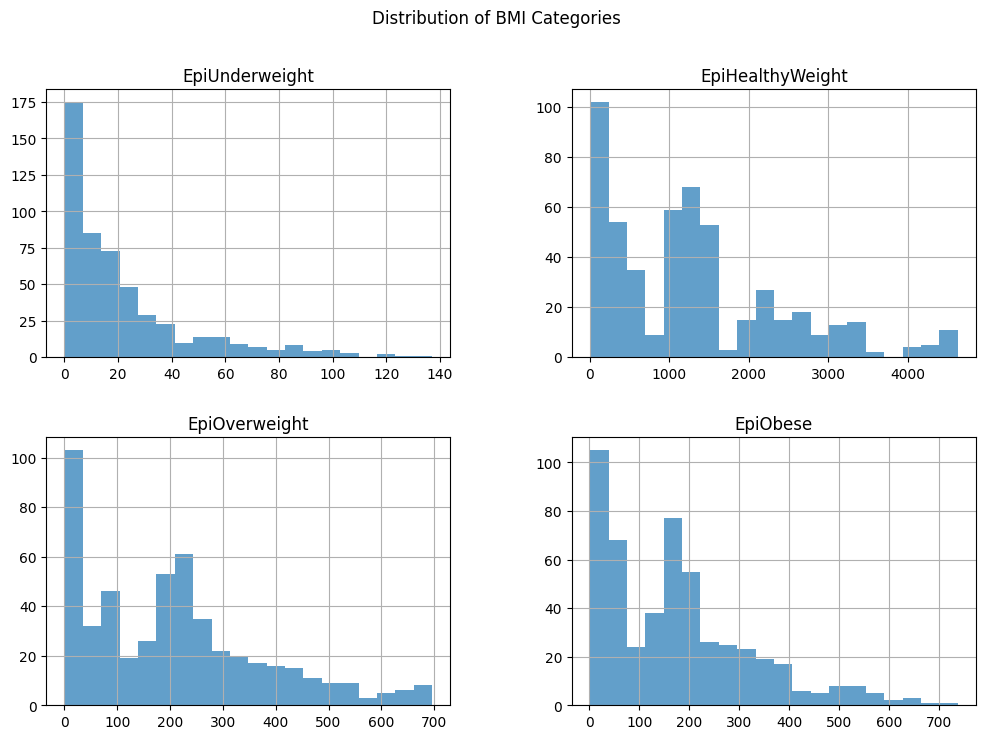

In [369]:
plt.figure(figsize=(12, 6))
df[['EpiUnderweight', 'EpiHealthyWeight', 'EpiOverweight', 'EpiObese']].hist(bins=20, figsize=(12, 8), alpha=0.7)
plt.suptitle("Distribution of BMI Categories")
plt.show()

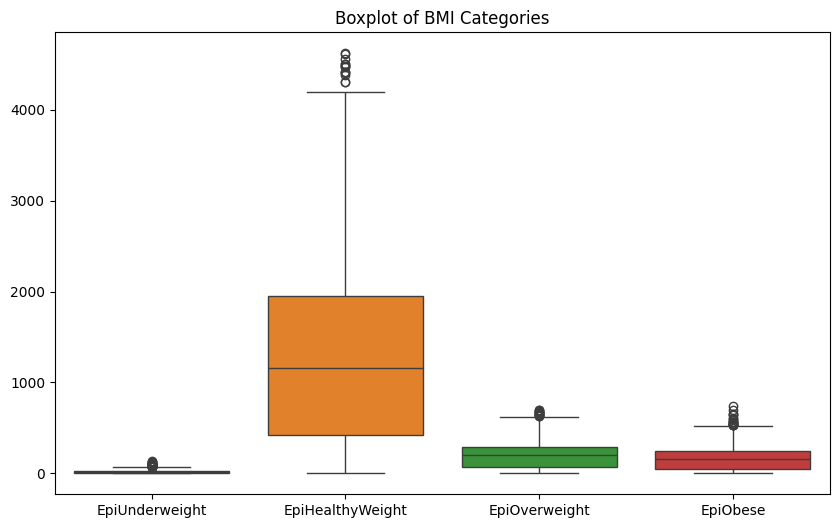

In [370]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['EpiUnderweight', 'EpiHealthyWeight', 'EpiOverweight', 'EpiObese']])
plt.title("Boxplot of BMI Categories")
plt.show()

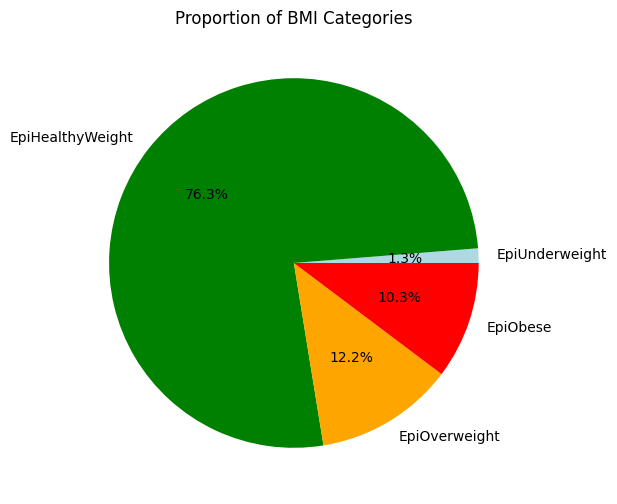

In [371]:
bmi_sums = df[['EpiUnderweight', 'EpiHealthyWeight', 'EpiOverweight', 'EpiObese']].sum()
plt.figure(figsize=(8, 6))
plt.pie(bmi_sums, labels=bmi_sums.index, autopct='%1.1f%%', colors=['lightblue', 'green', 'orange', 'red'])
plt.title("Proportion of BMI Categories")
plt.show()

<div style="border: 2px solid gold; padding: 2px; border-radius: 2px; background-color: #f0f8ff;">
<h2 style="color: #4682b4; text-align: center;">4. Exploratory Data Analysis (EDA)</h2> 
</div>

In [372]:
df_cleaned = df.dropna()

In [373]:
df_filled = df.fillna(df.median(numeric_only=True))

In [374]:
df_ffill = df.fillna(method="ffill")

In [375]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
df = df.drop_duplicates()

Number of duplicate rows: 0


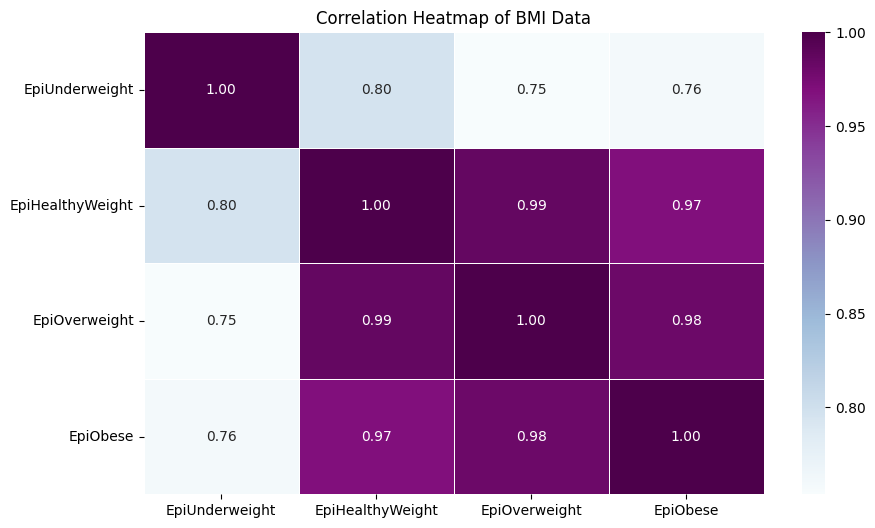

In [376]:
correlation_matrix = df[['EpiUnderweight', 'EpiHealthyWeight', 'EpiOverweight', 'EpiObese']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="BuPu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of BMI Data")
plt.show()

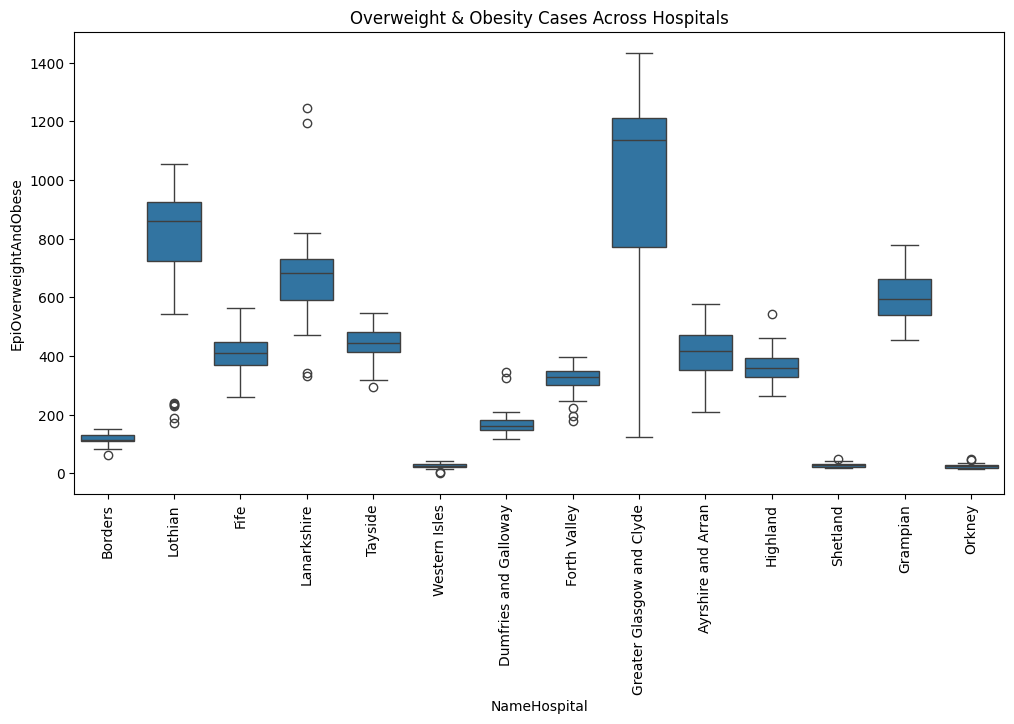

In [377]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='NameHospital', y='EpiOverweightAndObese', data=df)
plt.xticks(rotation=90)
plt.title("Overweight & Obesity Cases Across Hospitals")
plt.show()

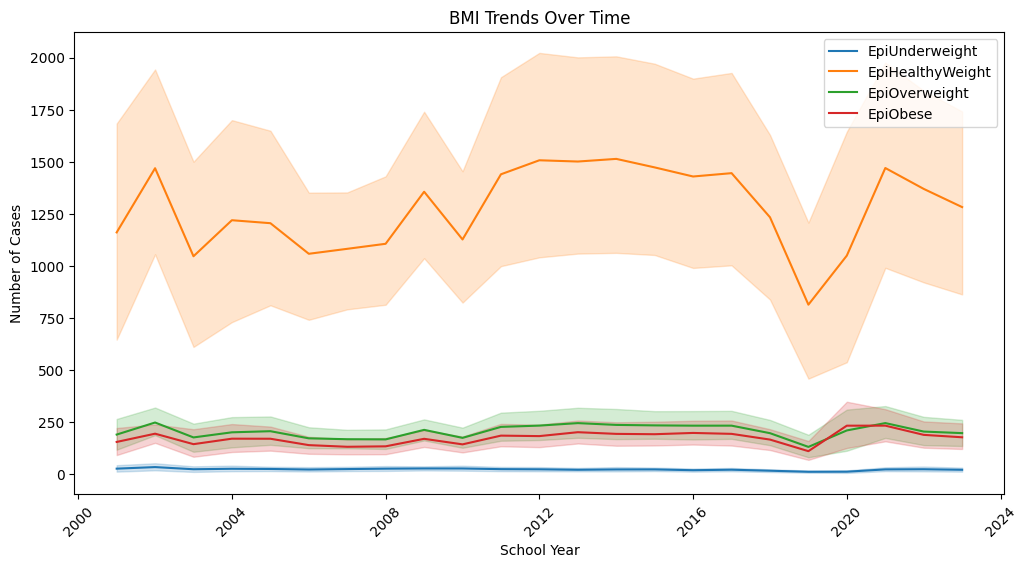

In [378]:
plt.figure(figsize=(12, 6))
for category in ['EpiUnderweight', 'EpiHealthyWeight', 'EpiOverweight', 'EpiObese']:
    sns.lineplot(x=df["SchoolYear"], y=df[category], label=category)
plt.xticks(rotation=45)
plt.title("BMI Trends Over Time")
plt.xlabel("School Year")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()

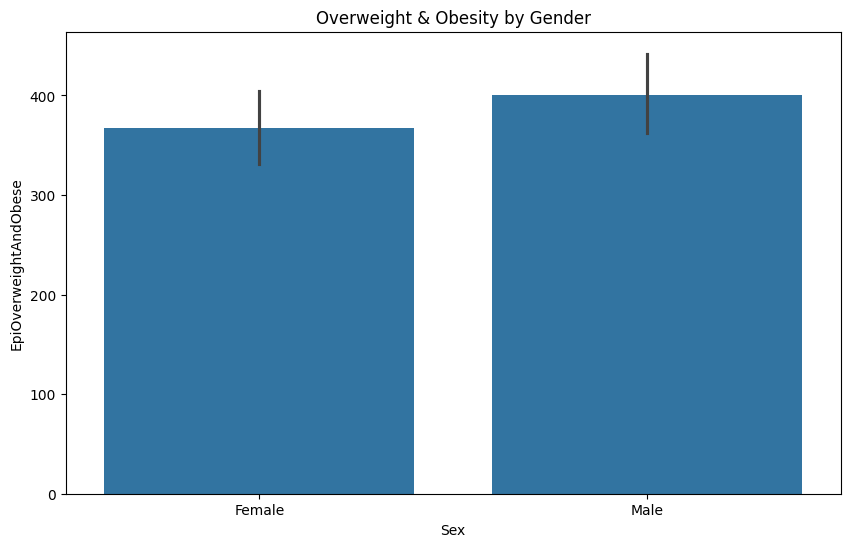

In [379]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Sex", y="EpiOverweightAndObese", data=df)
plt.title("Overweight & Obesity by Gender")
plt.show()


<div style="border: 2px solid gold; padding: 2px; border-radius: 2px; background-color: #f0f8ff;">
<h2 style="color: #4682b4; text-align: center;">5. Predictive & Advanced Analytics</h2> 
</div>

<div style="border: 2px white; padding: 2px; border-radius: 2px; background-color: MediumSeaGreen">
<h3 style="color: darkblue; ">
Clustering
</h2> 
</div>


<div style="background-color: LightGray; padding: 2px; border-radius: 2px;">
    <h3 style="color: darkblue;">Relevant Features</h3>
</div>


In [380]:
features = ['EpiUnderweight', 'EpiHealthyWeight', 'EpiOverweight', 'EpiObese']
X = df[features]

In [381]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<div style="background-color: LightGray; padding: 2px; border-radius: 2px;">
    <h3 style="color: darkblue;">K-Means Clustering</h3>
</div>

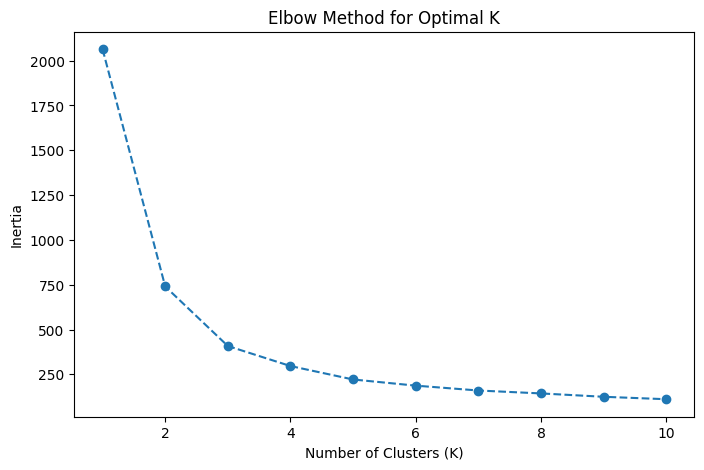

In [382]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [383]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

<div style="background-color: LightGray; padding: 2px; border-radius: 2px;">
    <h3 style="color: darkblue;">Principal Component Analysis-PCA</h3>
</div>

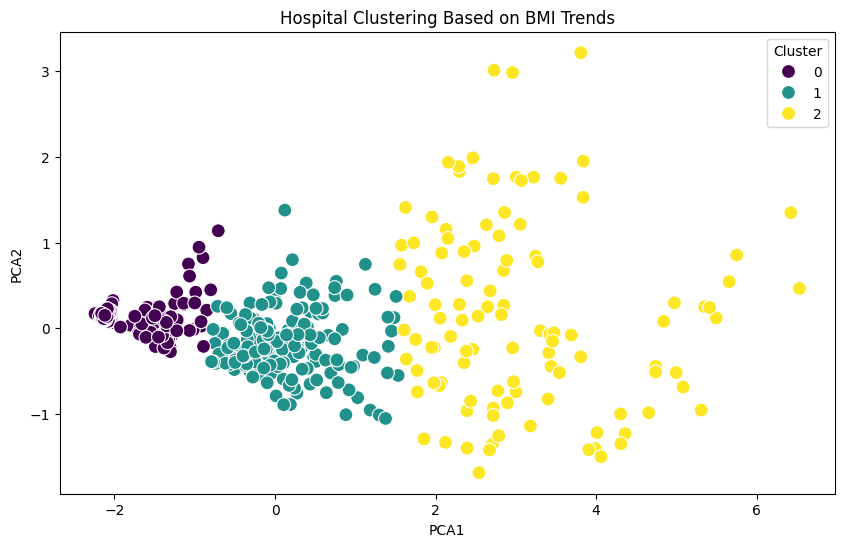

In [384]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Hospital Clustering Based on BMI Trends')
plt.show()

In [385]:
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)

         EpiUnderweight  EpiHealthyWeight  EpiOverweight    EpiObese
Cluster                                                             
0              4.035533        277.944162      47.065990   37.614213
1             18.611374       1369.018957     228.587678  188.772512
2             60.157407       3052.018519     461.824074  401.388889


<div style="background-color: LightGray; padding: 2px; border-radius: 2px;">
    <h3 style="color: darkblue;">Outlier </h3>
</div>

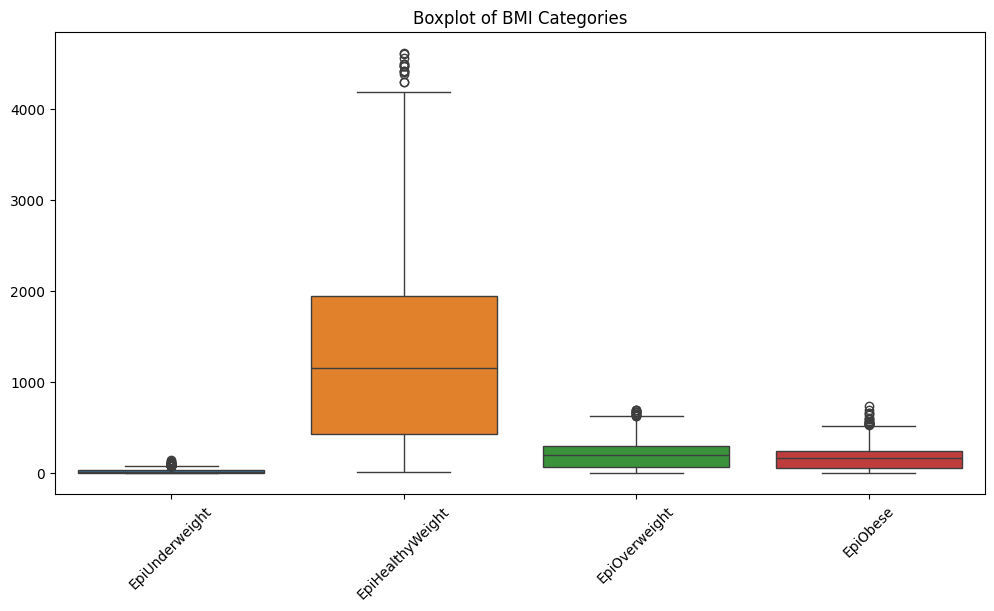

In [386]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.title('Boxplot of BMI Categories')
plt.show()

In [387]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (X < lower_bound) | (X > upper_bound)
outlier_counts = outliers.sum()
print("Outliers per column:\n", outlier_counts)

Outliers per column:
 EpiUnderweight      34
EpiHealthyWeight    14
EpiOverweight       14
EpiObese            19
dtype: int64


<div style="background-color: LightGray; padding: 2px; border-radius: 2px;">
    <h3 style="color: darkblue;">Using Z-Score Method</h3>
</div>

In [388]:
z_scores = np.abs(zscore(X))
threshold = 3
outliers_zscore = (z_scores > threshold).sum(axis=0)
print("Outliers detected using Z-score:\n", outliers_zscore)

Outliers detected using Z-score:
 EpiUnderweight      11
EpiHealthyWeight     1
EpiOverweight        0
EpiObese             5
dtype: int64


<div style="background-color: LightGray; padding: 2px; border-radius: 2px;">
    <h3 style="color: darkblue;">Outliers Using Isolation Forest Algoritham</h3>
</div>

In [389]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)  
df["Outlier"] = iso_forest.fit_predict(X)
outlier_hospitals = df[df["Outlier"] == -1]
print("Number of detected outliers:", len(outlier_hospitals))
print(outlier_hospitals[['NameHospital', 'EpiUnderweight', 'EpiObese']])

Number of detected outliers: 26
                  NameHospital  EpiUnderweight  EpiObese
119                Lanarkshire             122       261
173                Lanarkshire             120       258
198  Greater Glasgow and Clyde              35       517
199  Greater Glasgow and Clyde              67       568
201                Lanarkshire             137       339
226  Greater Glasgow and Clyde              52       542
227  Greater Glasgow and Clyde              88       534
254  Greater Glasgow and Clyde              43       483
255  Greater Glasgow and Clyde              98       593
282  Greater Glasgow and Clyde              65       515
283  Greater Glasgow and Clyde             106       516
310  Greater Glasgow and Clyde              48       509
311  Greater Glasgow and Clyde              78       545
339  Greater Glasgow and Clyde              85       538
366  Greater Glasgow and Clyde              40       500
367  Greater Glasgow and Clyde              87       589

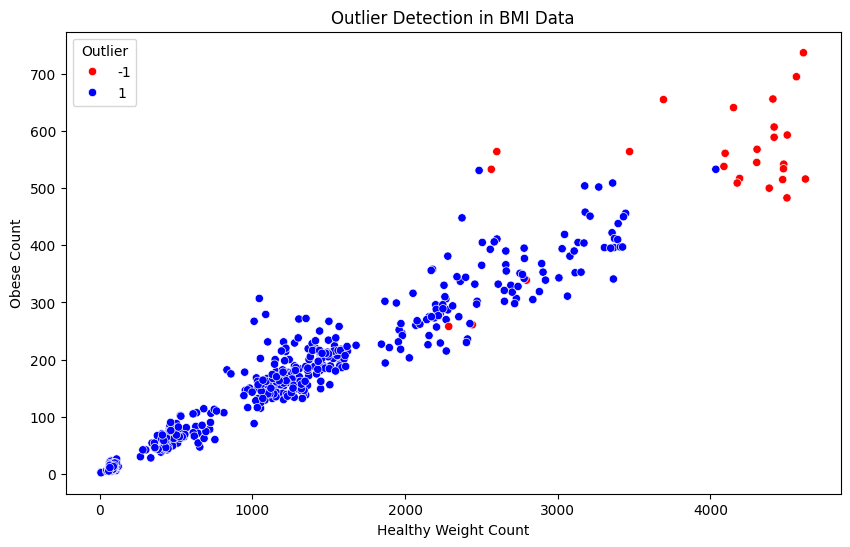

In [390]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['EpiHealthyWeight'], y=df['EpiObese'], hue=df['Outlier'], palette={1: 'blue', -1: 'red'})
plt.title("Outlier Detection in BMI Data")
plt.xlabel("Healthy Weight Count")
plt.ylabel("Obese Count")
plt.show()

<div style="border: 2px white; padding: 2px; border-radius: 2px; background-color: green">
<h2 style="color: white; text-align: center;">
Classification
</h2> 
</div>

In [391]:
def classify_bmi(row):
    categories = ['EpiUnderweight', 'EpiHealthyWeight', 'EpiOverweight', 'EpiObese']
    return categories[np.argmax(row[categories].values)]
df['BMI_Category'] = df.apply(classify_bmi, axis=1)
print(df['BMI_Category'].value_counts())  

BMI_Category
EpiHealthyWeight    516
Name: count, dtype: int64


In [392]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])  
df['BMI_Category'] = encoder.fit_transform(df['BMI_Category'])  
X = df[['Sex', 'EpiUnderweight', 'EpiHealthyWeight', 'EpiOverweight', 'EpiObese']]
y = df['BMI_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data size:", X_train.shape)

Training data size: (412, 5)


<div style="background-color: LightGray; padding: 2px; border-radius: 2px;">
    <h3 style="color: darkblue;">Train a Decision Tree Classifier</h3>
</div>

In [393]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



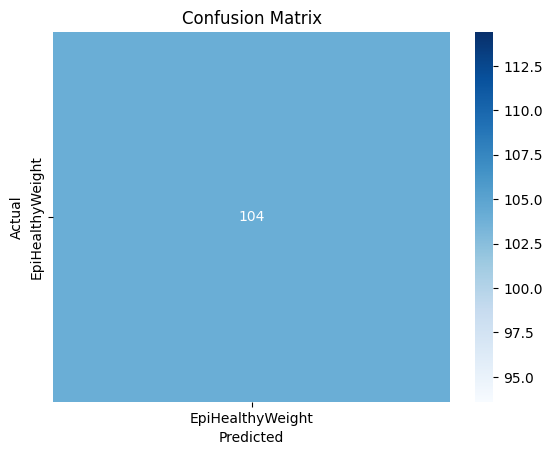

In [394]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<div style="border: 2px white; padding: 2px; border-radius: 2px; background-color: green">
<h2 style="color: white; text-align: center;">
Segmentation
</h2> 
</div>

<div style="background-color: LightGray; padding: 2px; border-radius: 2px;">
    <h3 style="color: darkblue;">K-Means Clustering for Hospitals</h3>
</div>

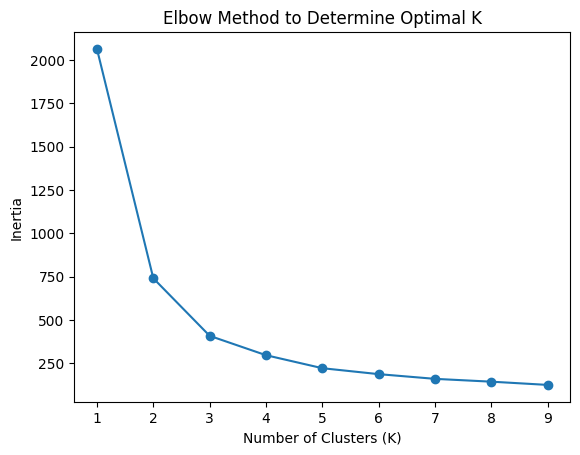

In [395]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal K")
plt.show()


In [396]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print(df[['NameHospital', 'Cluster']].head())

  NameHospital  Cluster
0      Borders        0
1      Borders        0
2      Lothian        0
3      Lothian        0
4         Fife        1


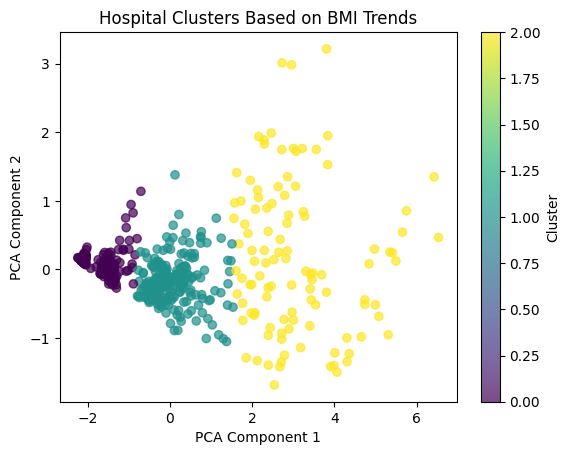

In [397]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Hospital Clusters Based on BMI Trends")
plt.colorbar(label="Cluster")
plt.show()

In [398]:
df.groupby("Cluster")[['EpiUnderweight', 'EpiObese']].mean()


,EpiUnderweight,EpiObese
Cluster,,
0,4.035533,37.614213
1,18.611374,188.772512
2,60.157407,401.388889


<div style="background-color: LightGray; padding: 2px; border-radius: 2px;">
    <h3 style="color: darkblue;">Hierarchical Clustering</h3>
</div>

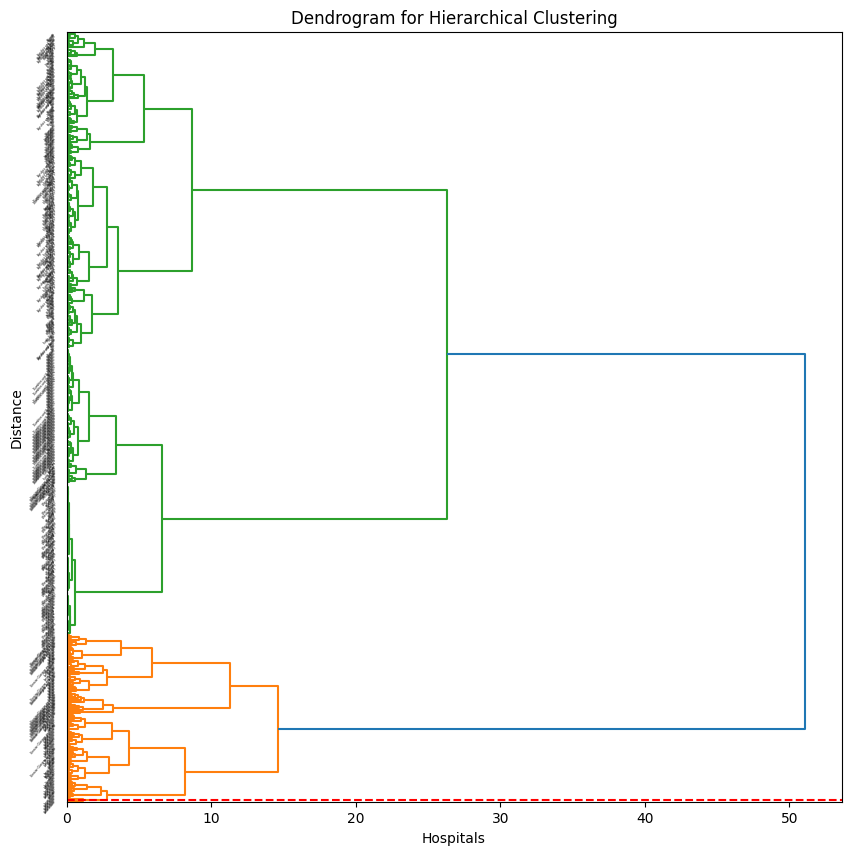

In [399]:
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 10))
dendrogram(linked, labels=df['NameHospital'].values, leaf_rotation=50, orientation='right',leaf_font_size=2)
plt.axhline(y=10, color='r', linestyle='--') 
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Hospitals")
plt.ylabel("Distance")
plt.show()

In [400]:
bmi_columns = ['EpiUnderweight', 'EpiHealthyWeight', 'EpiOverweight', 'EpiObese', 'EpiOverweightAndObese']
X = df[bmi_columns]
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Cluster'] = clustering.fit_predict(X)


In [401]:
cluster_summary = df.groupby('Cluster')[bmi_columns].mean().reset_index()
print(cluster_summary)


   Cluster  EpiUnderweight  EpiHealthyWeight  EpiOverweight    EpiObese  \
0        0       53.350746       2861.440299     435.776119  374.097015   
1        1        4.125000        286.060000      48.760000   39.385000   
2        2       17.829670       1277.972527     215.576923  179.038462   

   EpiOverweightAndObese  
0             809.873134  
1              88.145000  
2             394.615385  


In [402]:
hospital_clusters = df[['NameHospital', 'Cluster']].drop_duplicates().sort_values(by='Cluster')
print(hospital_clusters)


                  NameHospital  Cluster
6                  Lanarkshire        0
142  Greater Glasgow and Clyde        0
128                   Grampian        0
32                     Lothian        0
0                      Borders        1
402               Forth Valley        1
398         Ayrshire and Arran        1
160                     Orkney        1
108                   Shetland        1
72   Greater Glasgow and Clyde        1
30       Dumfries and Galloway        1
20               Western Isles        1
2                      Lothian        1
404                   Highland        1
76          Ayrshire and Arran        2
104                   Highland        2
46                Forth Valley        2
12                     Tayside        2
4                         Fife        2
416                Lanarkshire        2


In [403]:
pivot_table = df.pivot_table(index='NameHospital', columns='Cluster', aggfunc='size', fill_value=0)
print(pivot_table)


Cluster                     0   1   2
NameHospital                         
Ayrshire and Arran          0   2  32
Borders                     0  40   0
Dumfries and Galloway       0  38   0
Fife                        0   0  44
Forth Valley                0   2  34
Grampian                   26   0   0
Greater Glasgow and Clyde  26   8   0
Highland                    0   2  30
Lanarkshire                42   0   2
Lothian                    40   6   0
Orkney                      0  28   0
Shetland                    0  32   0
Tayside                     0   0  40
Western Isles               0  42   0


In [404]:
num_clusters = 3  
df['Cluster'] = fcluster(linked, num_clusters, criterion='maxclust')
print(df[['NameHospital', 'Cluster']].head(10))


  NameHospital  Cluster
0      Borders        2
1      Borders        2
2      Lothian        3
3      Lothian        2
4         Fife        3
5         Fife        3
6  Lanarkshire        1
7  Lanarkshire        1
8      Lothian        3
9      Lothian        2


In [405]:
print(df['Cluster'].value_counts())
print(df.groupby("Cluster")[features].mean())

Cluster
3    212
2    192
1    112
Name: count, dtype: int64
         EpiUnderweight  EpiHealthyWeight  EpiOverweight    EpiObese
Cluster                                                             
1             59.633929       3009.526786     456.660714  396.821429
2              3.875000        266.171875      44.901042   35.869792
3             17.905660       1344.641509     224.594340  185.188679


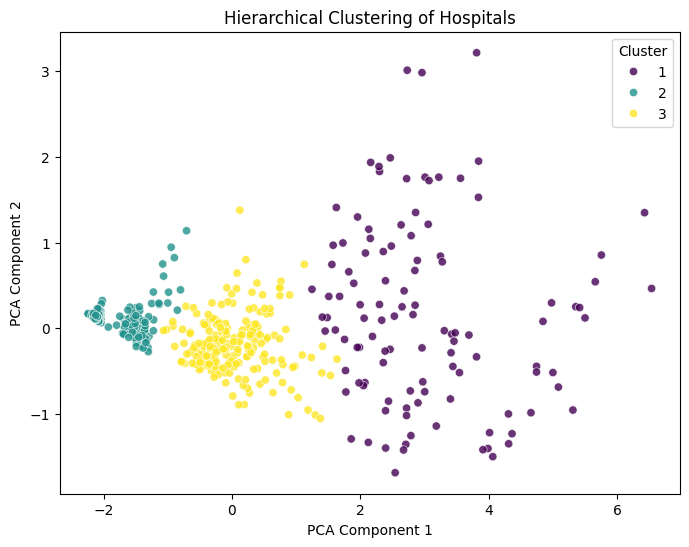

In [406]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', alpha=0.8)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Hierarchical Clustering of Hospitals")
plt.legend(title="Cluster")
plt.show()


<div style="border: 2px white; padding: 2px; border-radius: 2px; background-color: green">
<h2 style="color: white; text-align: center;">
Correlation
</h2> 
</div>

In [407]:
bmi_features = ['EpiUnderweight', 'EpiHealthyWeight', 'EpiOverweight', 'EpiObese', 
                'EpiOverweightAndObese', 'ValidCounts', 'UnvalidCounts', 'TotalCounts']
correlation_matrix = df[bmi_features].corr()
print(correlation_matrix)

                       EpiUnderweight  EpiHealthyWeight  EpiOverweight  \
EpiUnderweight               1.000000          0.795386       0.753651   
EpiHealthyWeight             0.795386          1.000000       0.985812   
EpiOverweight                0.753651          0.985812       1.000000   
EpiObese                     0.759861          0.969074       0.980778   
EpiOverweightAndObese        0.760214          0.982672       0.995758   
ValidCounts                  0.796534          0.999203       0.990403   
UnvalidCounts                0.760214          0.982672       0.995758   
TotalCounts                  0.791294          0.997850       0.992970   

                       EpiObese  EpiOverweightAndObese  ValidCounts  \
EpiUnderweight         0.759861               0.760214     0.796534   
EpiHealthyWeight       0.969074               0.982672     0.999203   
EpiOverweight          0.980778               0.995758     0.990403   
EpiObese               1.000000               0.9

<div style="background-color: LightGray; padding: 2px; border-radius: 2px;">
    <h3 style="color: darkblue;">Correlation Matrix</h3>
</div>

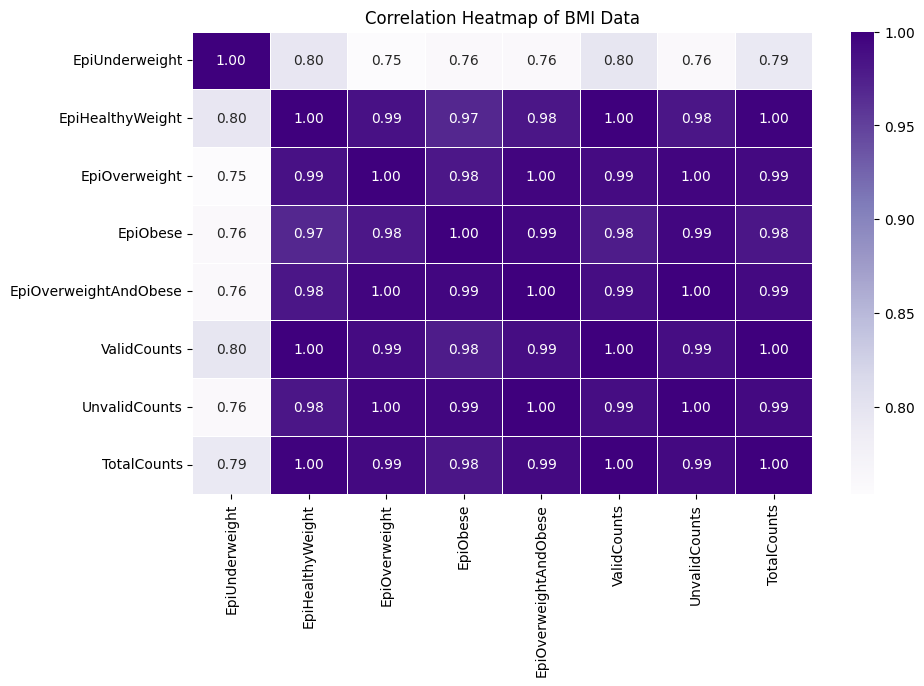

In [408]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Purples", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of BMI Data")
plt.show()

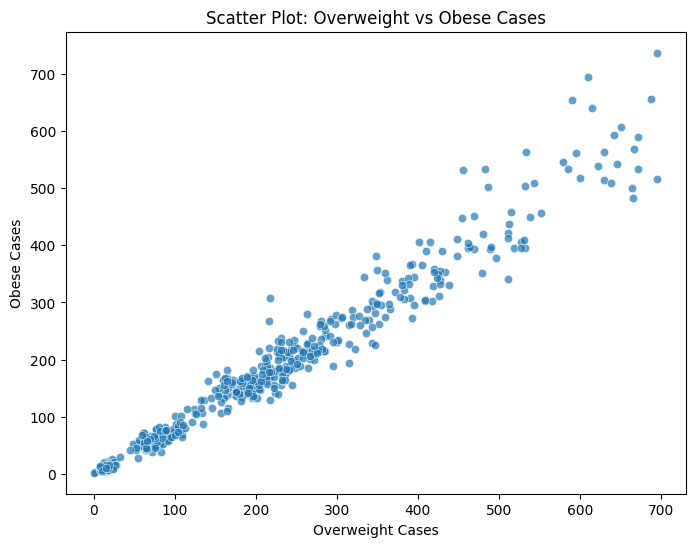

In [409]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["EpiOverweight"], y=df["EpiObese"], alpha=0.7)
plt.xlabel("Overweight Cases")
plt.ylabel("Obese Cases")
plt.title("Scatter Plot: Overweight vs Obese Cases")
plt.show()

<div style="background-color: LightGray; padding: 2px; border-radius: 2px;">
    <h3 style="color: darkblue;">Correlation Matrices for Each Hospital</h3>
</div>

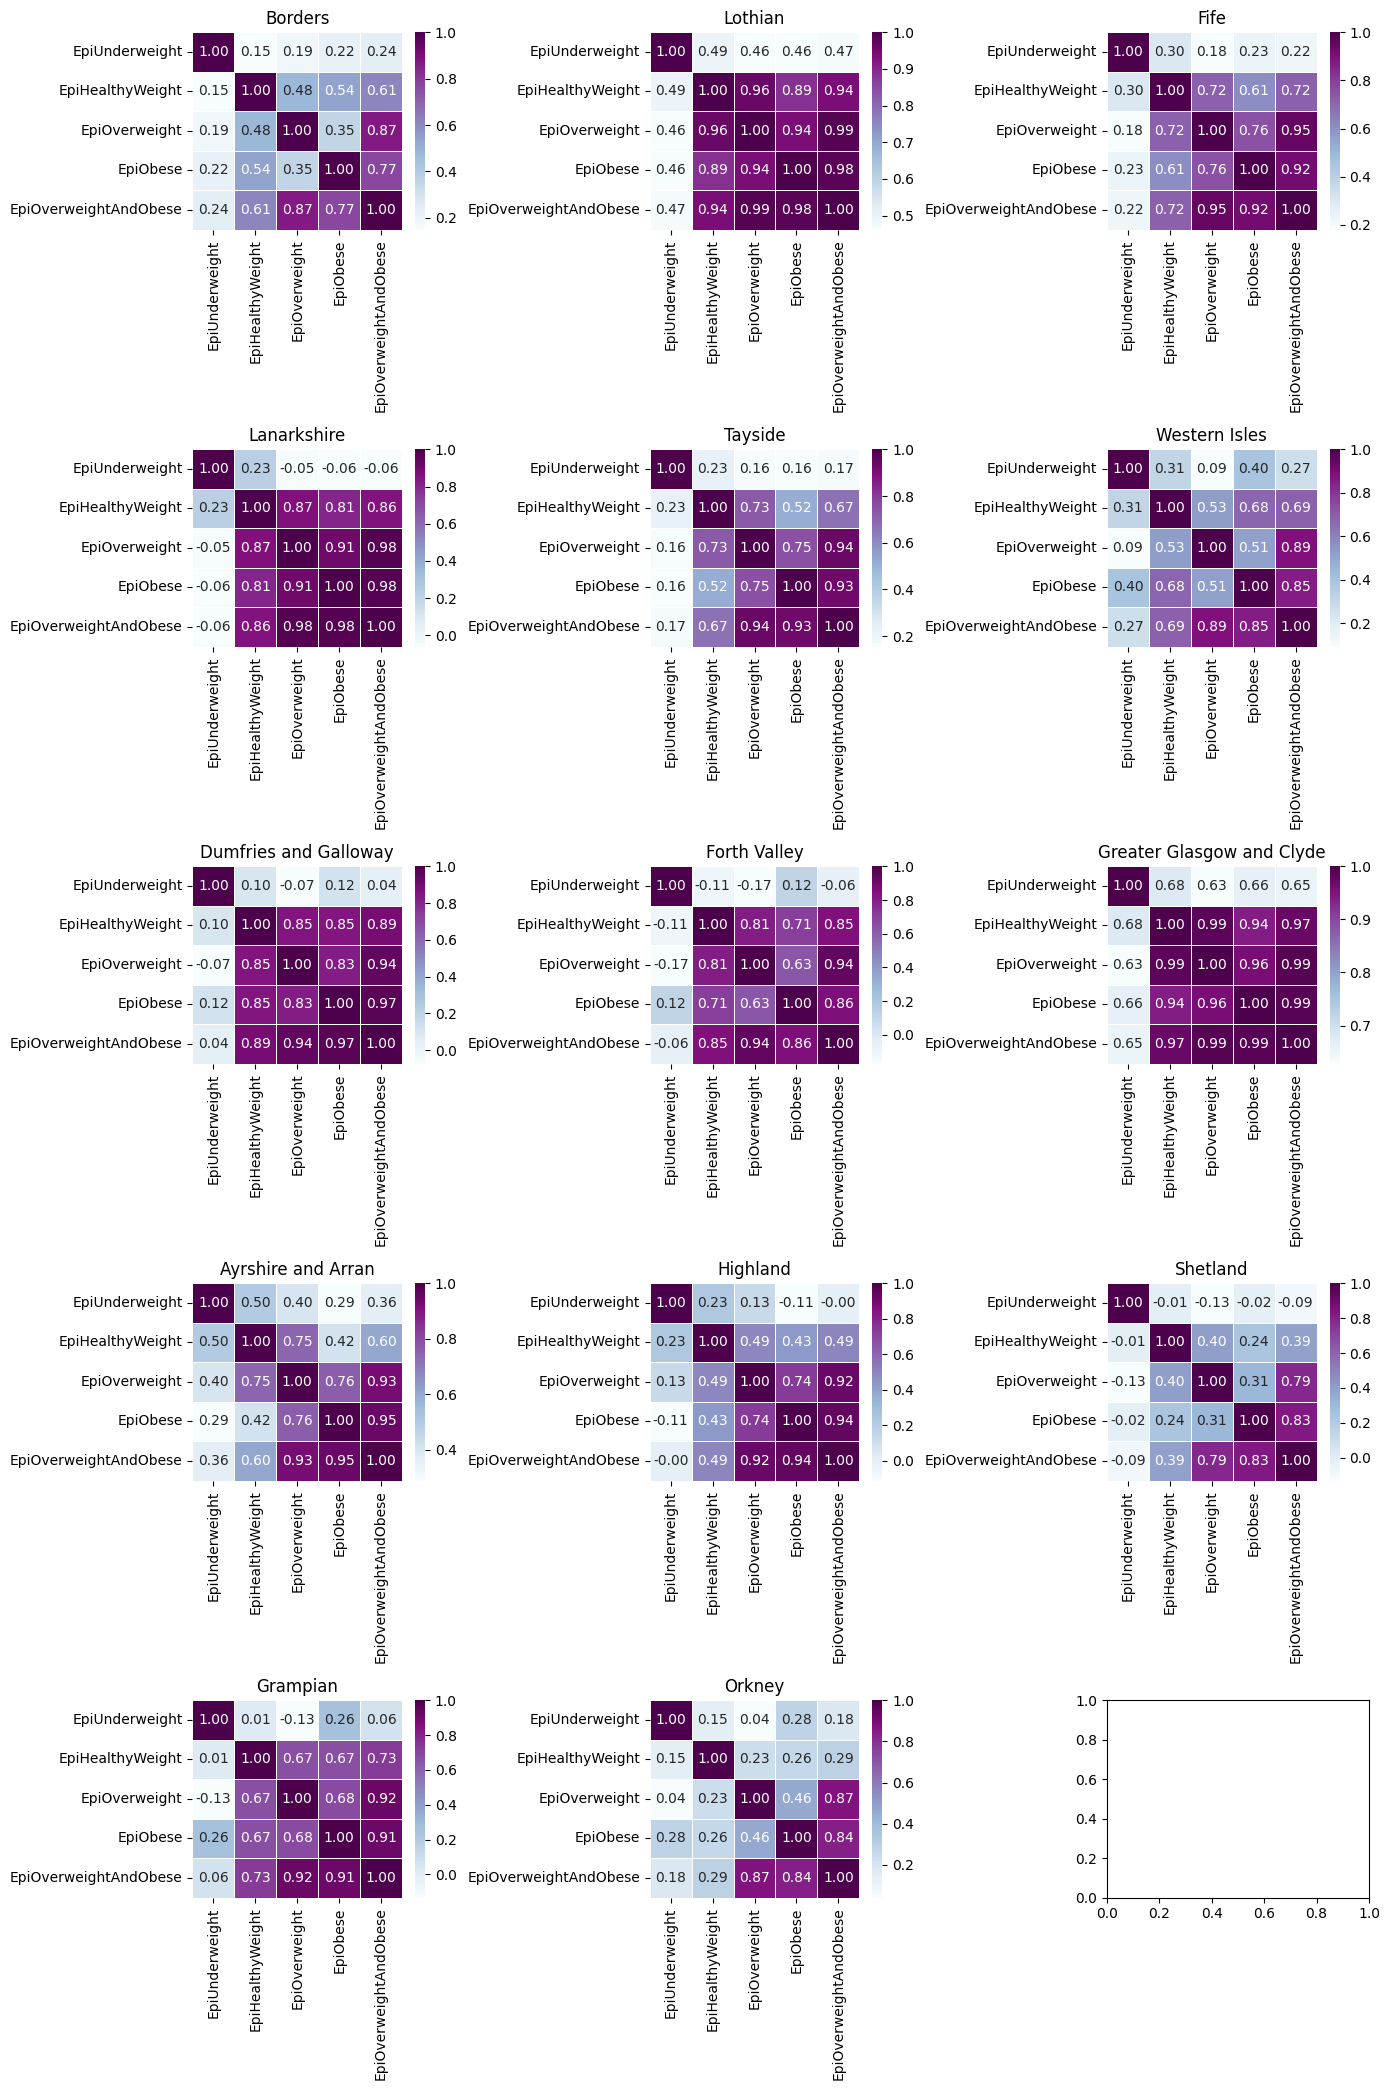

In [410]:
bmi_columns = ['EpiUnderweight', 'EpiHealthyWeight', 'EpiOverweight', 'EpiObese', 'EpiOverweightAndObese']
hospitals = df['NameHospital'].unique()
fig, axes = plt.subplots(nrows=len(hospitals)//3 + 1, ncols=3, figsize=(14, len(hospitals) * 1.5))


axes = axes.flatten()

for i, hospital in enumerate(hospitals):
  
    df_hospital = df[df['NameHospital'] == hospital]

    correlation_matrix = df_hospital[bmi_columns].corr()


    sns.heatmap(correlation_matrix, annot=True, cmap="BuPu", fmt=".2f", linewidths=0.5, ax=axes[i])
    axes[i].set_title(hospital)
    
plt.tight_layout()
plt.show()


<div style="background-color: LightGray; padding: 2px; border-radius: 2px;">
    <h3 style="color: darkblue;">Correlation Strength Across Hospitals</h3>
</div>

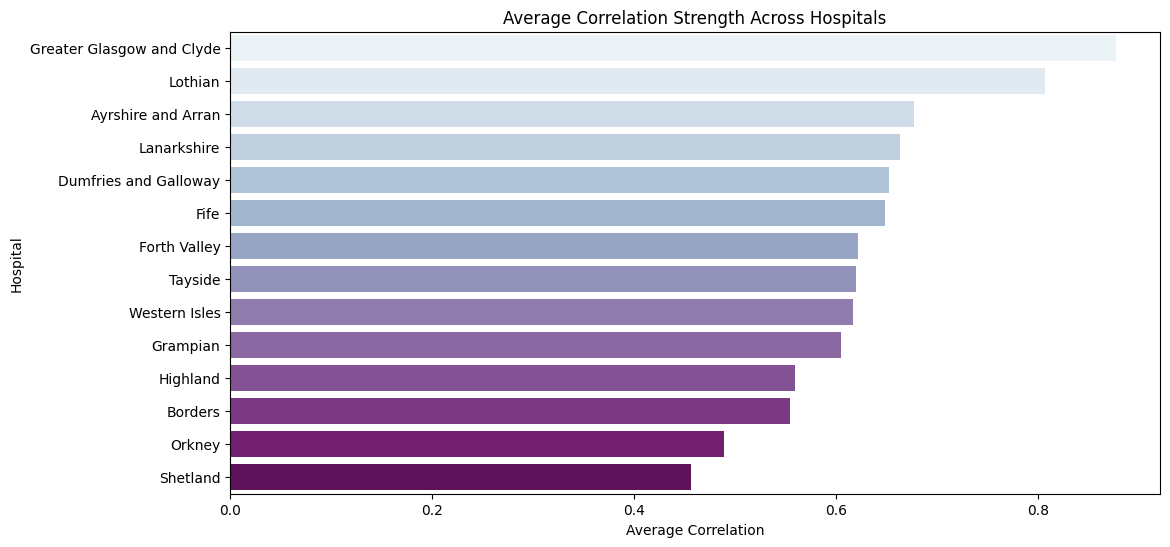

In [411]:

correlation_strength = {}

for hospital in hospitals:
    df_hospital = df[df['NameHospital'] == hospital]
    correlation_matrix = df_hospital[bmi_columns].corr()

    avg_correlation = correlation_matrix.abs().mean().mean()
    
    correlation_strength[hospital] = avg_correlation


correlation_df = pd.DataFrame(list(correlation_strength.items()), columns=['Hospital', 'Avg_Correlation'])


correlation_df = correlation_df.sort_values(by='Avg_Correlation', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x='Avg_Correlation', y='Hospital', data=correlation_df, palette="BuPu")
plt.title("Average Correlation Strength Across Hospitals")
plt.xlabel("Average Correlation")
plt.ylabel("Hospital")
plt.show()
